In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# metrics 
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib 
import warnings
warnings.filterwarnings("ignore")
#display
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.05)
pd.set_option('display.max_columns',200)

# loading the dataset

In [58]:
df = pd.read_csv("C:/Users/91778/OneDrive/Desktop/excel data/customer_data.csv")
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# info of dataset

In [59]:
(df.info())
(df.describe(include='all').T)


<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  str    
 3   gender            10000 non-null  str    
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), str(2)
memory usage: 1.0 MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


In [60]:
df.isnull().sum()
df['churn'].value_counts(normalize=False)
df['churn'].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

# Exploratory Data Analysis

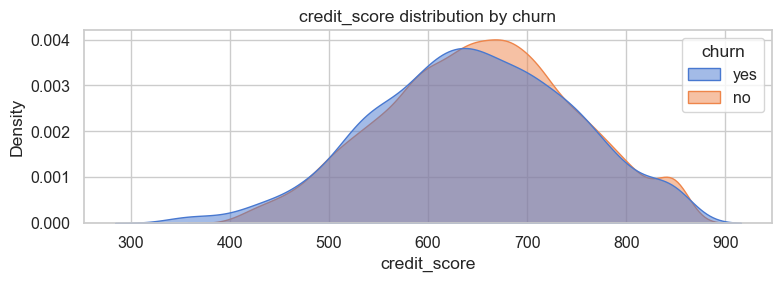

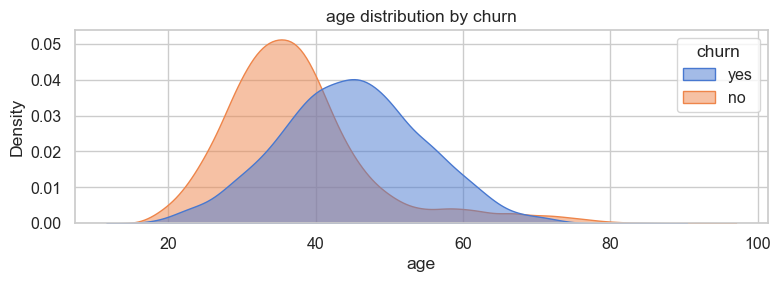

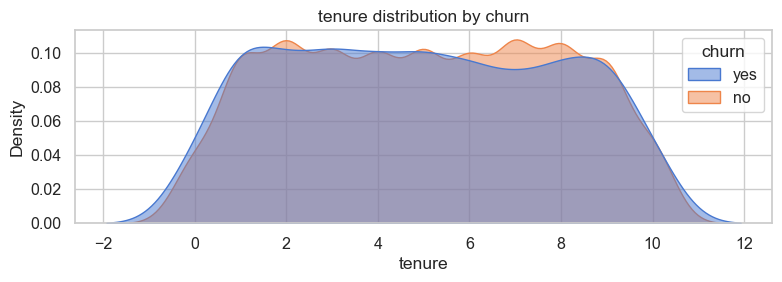

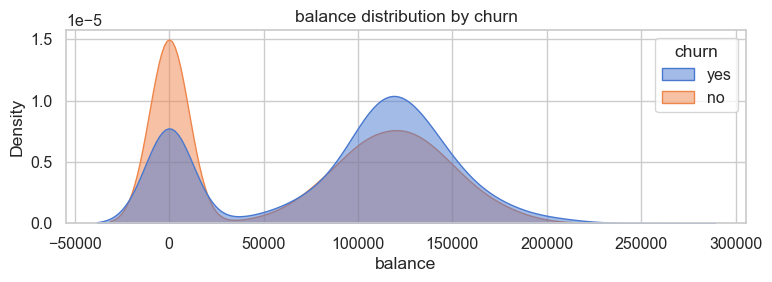

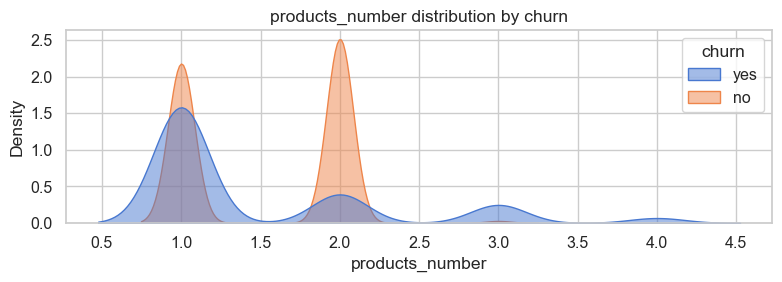

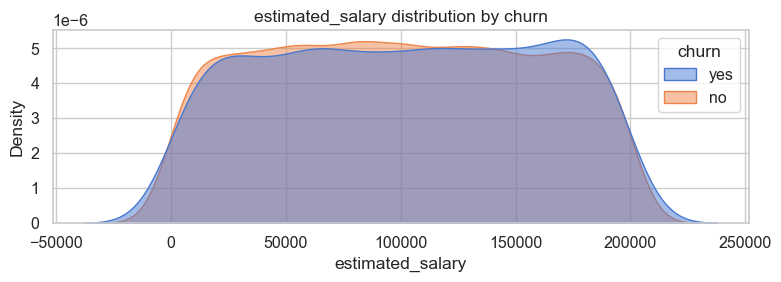

In [70]:
def converter(value):
    if value == 0:
        return "no"
    else:
        return "yes"

df['churn'] = df['churn'].apply(converter)

num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for col in num_cols:
    plt.figure(figsize=(8,3))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'{col} distribution by churn')
    plt.tight_layout()
    plt.show()

# Pairplot

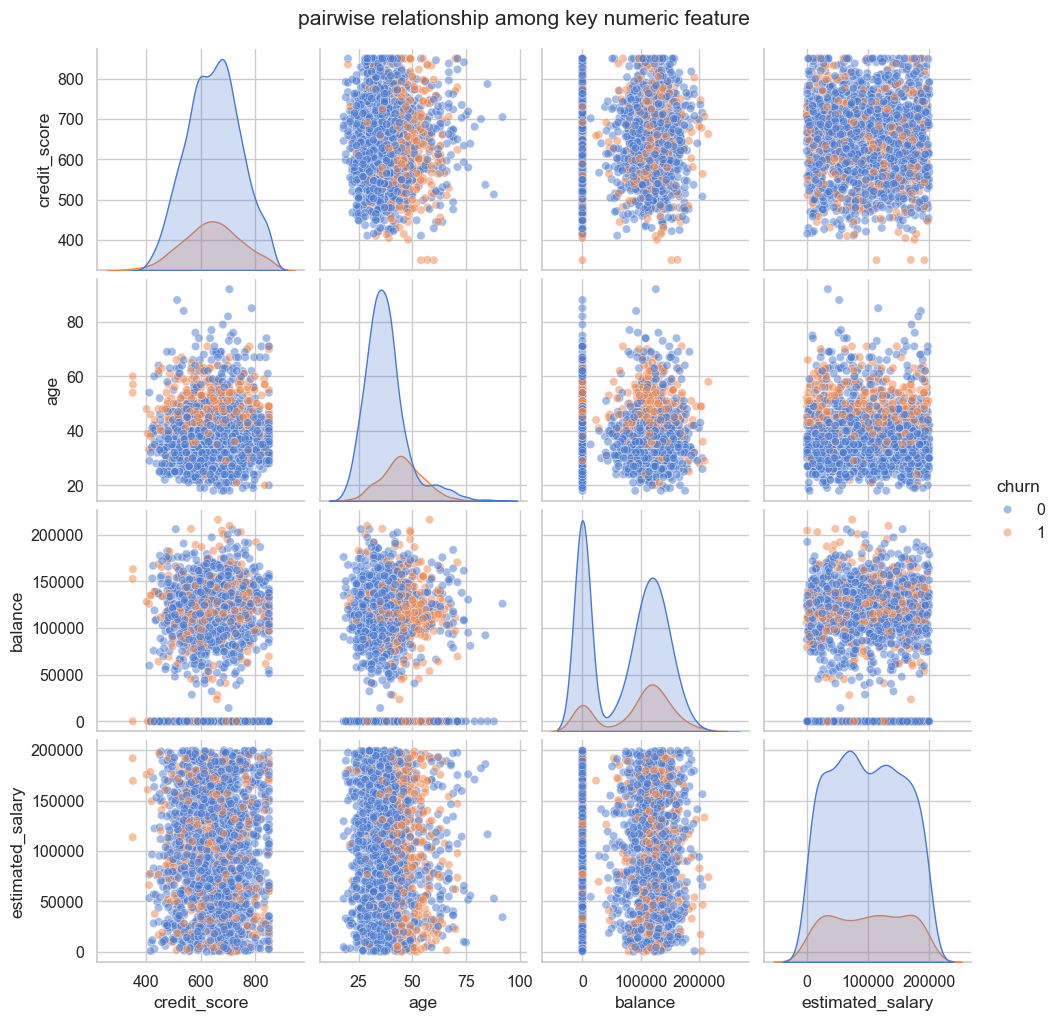

In [63]:
sns.pairplot(df.sample(frac=0.2, random_state=42),
             vars=['credit_score', 'age', 'balance', 'estimated_salary'],
             hue='churn', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('pairwise relationship among key numeric feature', y=1.02)
plt.show()

#violinplot for age

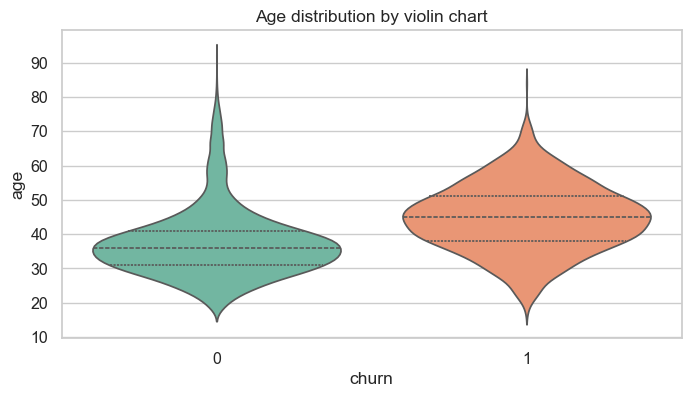

In [65]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='churn', y='age', inner='quart', palette='Set2')
plt.title('Age distribution by violin chart')
plt.show()
    

In [66]:
#churn by tenure

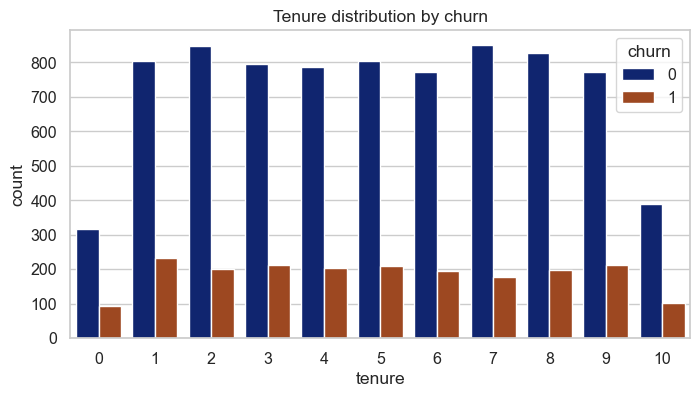

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='tenure', hue='churn', palette='dark')
plt.title('Tenure distribution by churn')
plt.show()

In [71]:
#gender vs doughnut chart

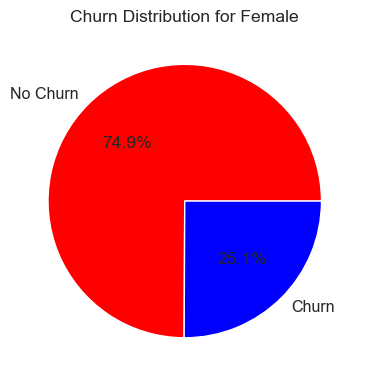

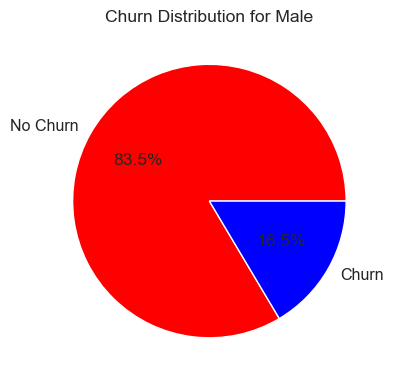

In [84]:
gender_counts = df.groupby('gender')['churn']\
                   .value_counts(normalize=True)\
                   .unstack()\
                   .fillna(0)

for gender in gender_counts.index:
    plt.figure(figsize=(6,4))
    
    plt.pie(
        gender_counts.loc[gender],
        labels=['No Churn', 'Churn'],
        autopct='%1.1f%%',
        colors=['red', 'blue']
    )
    
    plt.title(f'Churn Distribution for {gender}')
    plt.tight_layout()
    plt.show()
      



In [ ]:
#categorical features

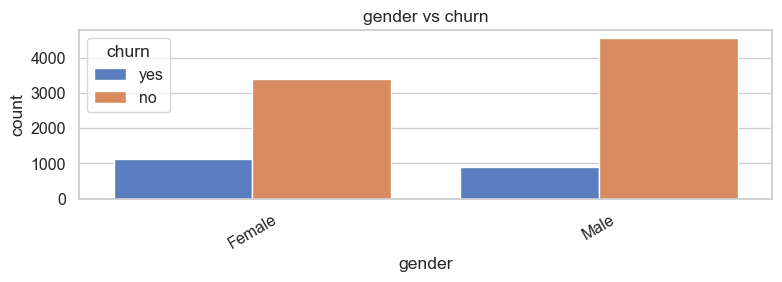

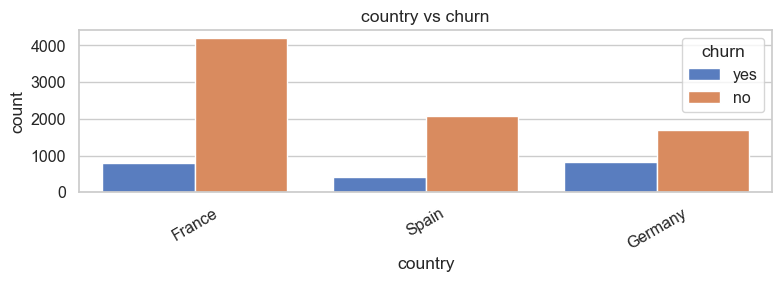

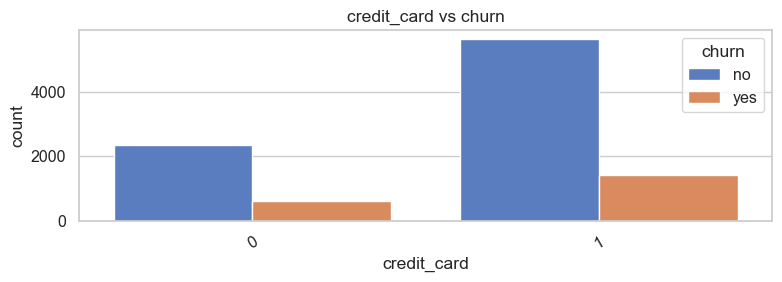

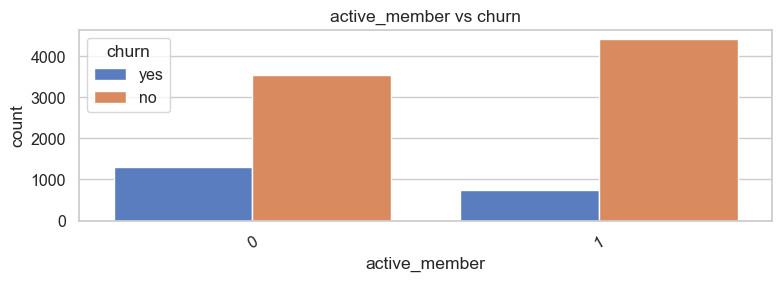

In [87]:
cat_cols = ['gender','country','credit_card','active_member']
for col in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'{col} vs churn')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# heatmap visualization

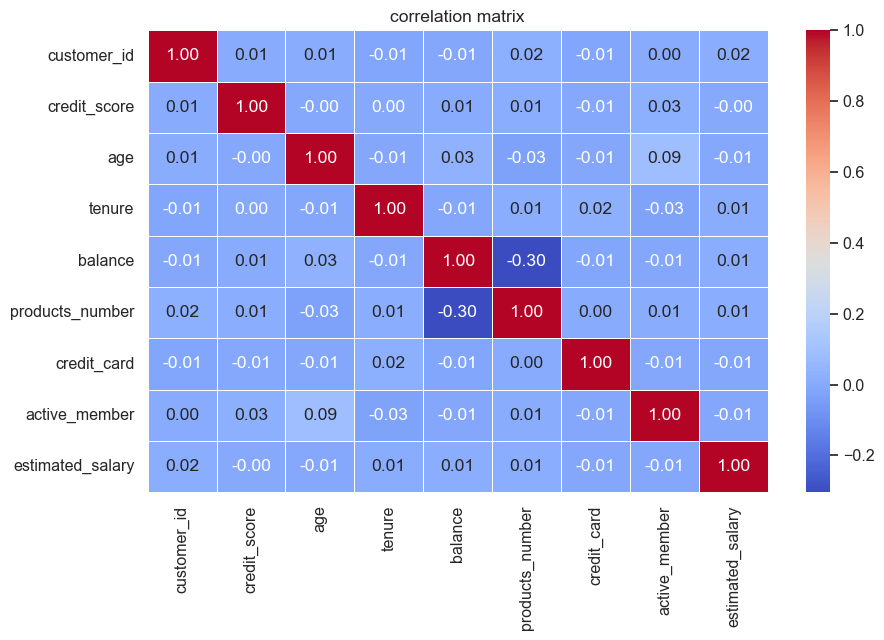

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('correlation matrix')
plt.show()


#numeric corelation

In [97]:
numeric_data = df[num_cols]
corr= numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,credit_score,age,tenure,balance,products_number,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


# balance vs product

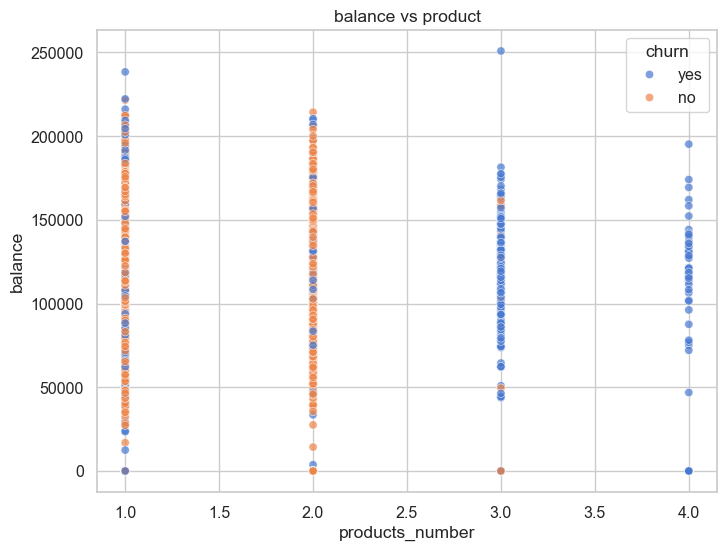

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='products_number', y='balance', hue='churn', alpha=0.7)
plt.title('balance vs product')
plt.show()

#Aggregate churn rate per number of products

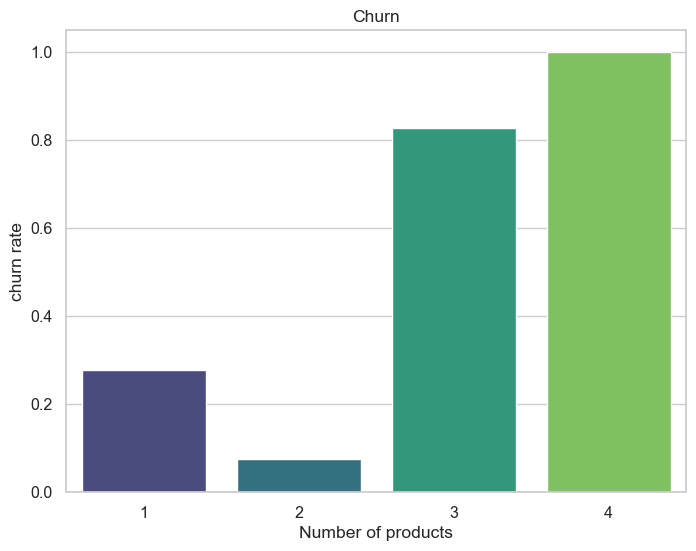

In [102]:
def convertStrToInt(value):
    if value == "no":
        return 0
    else:
        return 1

df['churn'] = df['churn'].apply(convertStrToInt)
    
churn_rate = df.groupby('products_number')['churn'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=churn_rate, x='products_number', y='churn', palette='viridis')
plt.xlabel('Number of products')
plt.ylabel('churn rate vs number of products')
plt.title('Churn')
plt.show()

#Feature Engineering

In [105]:
df_fe = df.copy()

df_fe['balance_per_product'] = df_fe['balance'] / (df_fe['products_number'].replace(0,np.nan))
df_fe['balance_per_product'].fillna(0, inplace=True)

df['salary_balance_ratio'] = df['estimated_salary'] / (df_fe['balance'].replace(0,np.nan))
df_fe['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

df_fe['salary_balance_ratio'].fillna(
    df_fe['salary_balance_ratio'].median(),
    inplace=True
)

# Age group
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

df_fe['age_group'] = pd.cut(
    df_fe['age'],
    bins=bins,
    labels=labels
)

# Tenure bucket
df_fe['tenure_bucket'] = pd.cut(
    df_fe['tenure'],
    bins=[-1, 0, 2, 5, 10, 100],
    labels=['0', '1-2', '3-5', '6-10', '10+']
)

# Flag high balance
df_fe['high_balance'] = (
    df_fe['balance'] > df_fe['balance'].quantile(0.75)
).astype(int)

# Quick checks
df_fe[['balance_per_product',
       'salary_balance_ratio',
       'age',
       'age_group',
       'tenure',
       'tenure_bucket',
       'high_balance']].head()

,balance_per_product,salary_balance_ratio,age,age_group,tenure,tenure_bucket,high_balance
0,0.000000,NaN,42,35-44,2,1-2,0
1,83807.860000,1.342864,41,35-44,1,1-2,0
2,53220.266667,0.713585,42,35-44,8,6-10,1
3,0.000000,NaN,39,35-44,1,1-2,0
4,125510.820000,0.630098,43,35-44,2,1-2,0


#Preprocessing

In [107]:
# Target column
target = 'churn'

# Columns to drop
drop_cols = ['customer_id']

# Feature list (excluding target and drop columns)
features = [c for c in df_fe.columns if c not in [target] + drop_cols]


# -------------------------
# Numeric and Categorical Features
# -------------------------

numeric_features = [
    'credit_score',
    'age',
    'tenure',
    'balance',
    'products_number',
    'estimated_salary',
    'balance_per_product',
    'salary_balance_ratio'
]

categorical_features = [
    'country',
    'gender',
    'credit_card',
    'active_member',
    'age_group',
    'tenure_bucket',
    'high_balance'
]

# Convert categorical columns to object type
df_fe[categorical_features] = df_fe[categorical_features].astype('object')


# -------------------------
# Numeric Transformer Pipeline
# -------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# -------------------------
# Categorical Transformer Pipeline
# -------------------------

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


# -------------------------
# Column Transformer (Preprocessor)
# -------------------------

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


# Print Features
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'balance_per_product', 'salary_balance_ratio']
Categorical Features: ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bucket', 'high_balance']


# Train

In [109]:
X = df_fe[features]
y = df_fe[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 42)
print('Train Shape:', X_train.shape, X_test.shape)
print('Train churn proportion:', y_train.mean(), 'Test churn proportion:', y_test.mean())

Train Shape: (8000, 16) (2000, 16)
Train churn proportion: 0.20375 Test churn proportion: 0.2035


# Training multiple models and comparing cross-validation

In [112]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    
    'RandomForest': RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),
    
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=200,
        random_state=42
    ),
    
    'AdaBoost': AdaBoostClassifier(
        n_estimators=200,
        random_state=42
    ),
    
    'SVC': SVC(
        probability=True,
        random_state=42
    )
}

# Cross Validation Strategy
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

results = {}

# Model Evaluation Loop

for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    results[name] = scores
    
    print(f"{name} AUC: "
          f"Mean={scores.mean():.4f} "
          f"Std={scores.std():.4f}")

LogisticRegression AUC: Mean=0.7878 Std=0.0244
RandomForest AUC: Mean=0.8489 Std=0.0127
GradientBoosting AUC: Mean=0.8622 Std=0.0103
AdaBoost AUC: Mean=0.8462 Std=0.0133
SVC AUC: Mean=0.8351 Std=0.0104


#boxplot of CV AUC score

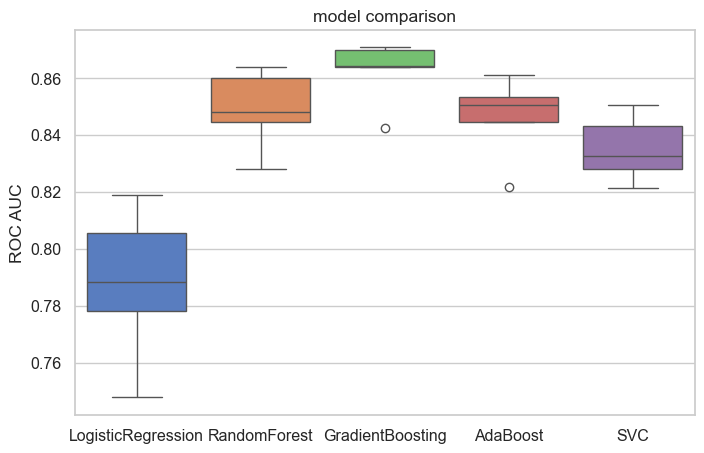

In [119]:
plt.figure(figsize=(8,5))
sns.boxplot(data=[results[m] for m in list(results.keys())])
plt.xticks(ticks= range(len(results)), labels= list(results.keys()))
plt.ylabel('ROC AUC')
plt.title('model comparison')
plt.show()

#Fit best model on training set

Best Model: GradientBoosting
Best CV AUC: 0.8621659234717954
Test Accuracy: 0.8645
Test Precision: 0.7698
Test Recall: 0.4767
Test F1-score: 0.5888
Test ROC AUC: 0.8687

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



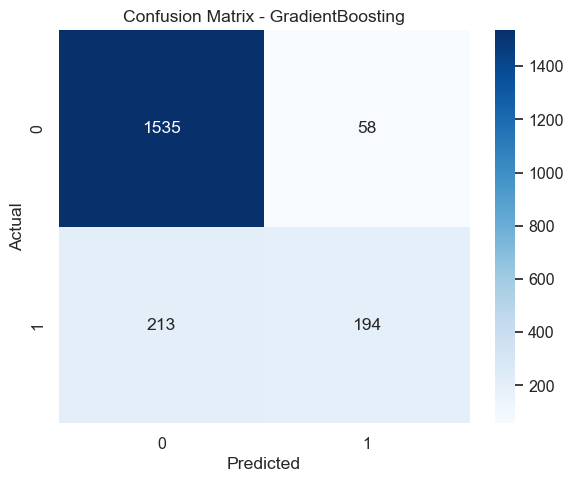

In [120]:
# Choose Best Model (based on mean AUC)

best_name = max(results.keys(), key=lambda k: results[k].mean())
best_score = results[best_name].mean()

print("Best Model:", best_name)
print("Best CV AUC:", best_score)

# Train Best Model on Full Training Data
best_model = models[best_name]

best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

best_pipeline.fit(X_train, y_train)

# Predictions
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_name}")
plt.tight_layout()
plt.show()

#Feature Importance

age                     0.327795
products_number         0.267303
balance_per_product     0.064717
balance                 0.052934
active_member_0         0.052485
country_Germany         0.050648
active_member_1         0.048412
salary_balance_ratio    0.028965
estimated_salary        0.026165
credit_score            0.023587
age_group_45-54         0.020738
age_group_55-64         0.008110
gender_Female           0.007837
gender_Male             0.005835
tenure                  0.005456
country_France          0.003275
tenure_bucket_3-5       0.001711
age_group_35-44         0.001395
country_Spain           0.000699
credit_card_1           0.000451
dtype: float64

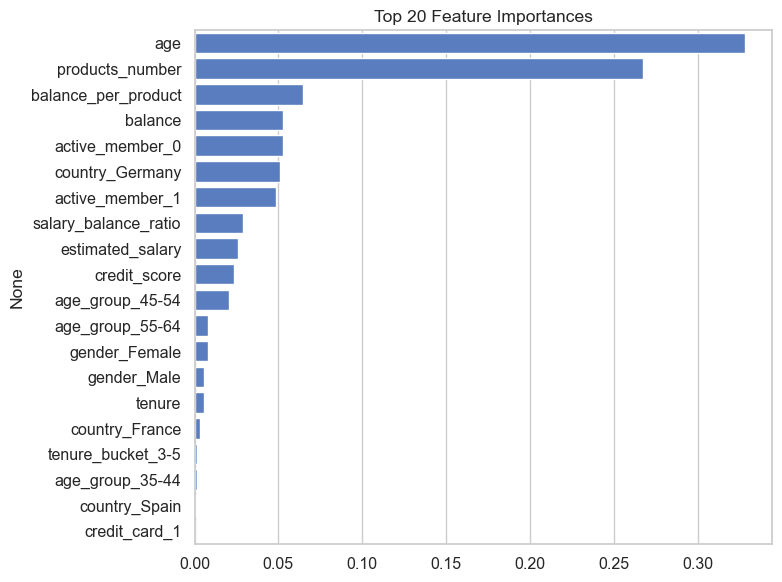

In [121]:
# Feature Importance (if available)
if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    
    # Numeric feature names
    num_feats = numeric_features
    
    # Get categorical feature names after OneHotEncoding
    cat_feats = list(
        best_pipeline.named_steps['preprocessor']
        .transformers_[1][1]      # categorical transformer
        .named_steps['onehot']
        .get_feature_names_out(categorical_features)
    )
    
    # Combine all feature names
    feature_names = num_feats + cat_feats
    
    # Get feature importances from model
    importances = best_pipeline.named_steps['classifier'].feature_importances_
    
    # Create sorted Series (Top 20)
    fi = pd.Series(importances, index=feature_names)\
           .sort_values(ascending=False)[:20]
    
    # Display top 20
    display(fi)
    
    # Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title("Top 20 Feature Importances")
    plt.tight_layout()
    plt.show()

else:
    print("Selected model does not provide feature_importances_ attribute.")

#Save the best Pipeline and preprocessing

In [122]:
joblib.dump(best_pipeline, 'best_churn_pipeline.pkl')
print('saved pipeline: best_churn_pipeline.pkl')

saved pipeline: best_churn_pipeline.pkl


#New Customer 

In [123]:
# New Customer Sample
sample = {
    'customer_id': 373292028,
    'credit_score': 650,
    'country': 'India',
    'gender': 'Male',
    'age': 40,
    'tenure': 3,
    'balance': 50000.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 1,
    'estimated_salary': 60000.0
}

sample_df = pd.DataFrame([sample])

# Apply Same Feature Engineering
# Balance per product
sample_df['balance_per_product'] = (
    sample_df['balance'] /
    sample_df['products_number'].replace(0, np.nan)
)
sample_df['balance_per_product'].fillna(0, inplace=True)

# Salary balance ratio
sample_df['salary_balance_ratio'] = (
    sample_df['estimated_salary'] /
    sample_df['balance'].replace(0, np.nan)
)
sample_df['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
sample_df['salary_balance_ratio'].fillna(
    sample_df['salary_balance_ratio'].median(),
    inplace=True
)

# Age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

sample_df['age_group'] = pd.cut(
    sample_df['age'],
    bins=bins,
    labels=labels
)

# Tenure bucket
sample_df['tenure_bucket'] = pd.cut(
    sample_df['tenure'],
    bins=[-1, 0, 2, 5, 10, 100],
    labels=['0', '1-2', '3-5', '6-10', '10+']
)

# High balance flag
sample_df['high_balance'] = (
    sample_df['balance'] > 50000.0
).astype(int)

# Drop ID Column
sample_df = sample_df.drop(columns=['customer_id'])

# Predict
pred = best_pipeline.predict(sample_df)[0]
prob = best_pipeline.predict_proba(sample_df)[0][1]

print("Prediction (0 = No Churn, 1 = Churn):", pred)
print("Churn Probability:", round(prob, 4))

Prediction (0 = No Churn, 1 = Churn): 0
Churn Probability: 0.0295
